#1.1_1: 1D Tenssor
<p>In this lab, you will learn the basics of tensor operations. Tensors are an essential part of PyTorch; there are complex mathematical objects in and of themselves. Fortunately, most of the intricacies are not necessary. In this section, you will compare them to vectors and numpy arrays.</p>
<ul>
    <li><a href="#Types_Shape">Types and Shape</a></li>
    <li><a href="#Index_Slice">Indexing and Slicing</a></li>
    <li><a href="#Tensor_Func">Tensor Functions</a></li>
    <li><a href="#Tensor_Op">Tensor Operations</a></li>
    <li><a href="#Device_Op">Device_Op Operations</a></li>
</ul>

<p>Estimated Time Needed: <b>25 min</b></p>
<hr>


In [1]:
#import library needed
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#check version pytorch
torch.__version__

'1.7.0+cu101'

This is the function for plotting diagrams. You will use this function to plot the vectors in Coordinate system.


In [4]:
# Plot vecotrs, please keep the parameters in the same length
# @param: Vectors = [{"vector": vector variable, "name": name of vector, "color": color of the vector on diagram}]
    
def plotVec(vectors):
    ax = plt.axes()
    
    # For loop to draw the vectors
    for vec in vectors:
        ax.arrow(0, 0, *vec["vector"], head_width = 0.05,color = vec["color"], head_length = 0.1)
        plt.text(*(vec["vector"] + 0.1), vec["name"])
    
    plt.ylim(-2,2)
    plt.xlim(-2,2)

## types and Shape
You can find the type of the folloeing  list of intergers [0,1,2,3,4] by applying the constructor torch.tensor()

In [6]:
#conver a interger list with length 5 to a tensor

ints_to_tensor = torch.tensor([0,1,2,3,4])
print("The dtype of tensor object after converting it to tensor: ", ints_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", ints_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.int64
The type of tensor object after converting it to tensor:  torch.LongTensor


In [7]:
type(ints_to_tensor)

torch.Tensor

You can find the type of this float list [0.0,1.0] by appling the method torch.tensor()

In [8]:
# Convert a float list with length 5 to a tensor

floats_to_tensor = torch.tensor([0.0, 1.0, 2.0, 3.0, 4.0])
print("The dtype of tensor object after converting it to tensor: ", floats_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", floats_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.float32
The type of tensor object after converting it to tensor:  torch.FloatTensor


In [ ]:
#the float list is converted to a float tensor

In [9]:
list_floats=[0.0, 1.0, 2.0, 3.0, 4.0]

floats_int_tensor=torch.tensor(list_floats,dtype=torch.int64)

In [11]:
print("The dtype of tensor object is: ", floats_int_tensor.dtype)
print("The type of tensor object is: ", floats_int_tensor.type())
print(floats_int_tensor)

The dtype of tensor object is:  torch.int64
The type of tensor object is:  torch.LongTensor
tensor([0, 1, 2, 3, 4])


In [13]:
#Convert a integer list with length 5 to float tensor
new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])
new_float_tensor.type()
print("The type of the new_float_tensor:", new_float_tensor.type())
print(new_float_tensor)

The type of the new_float_tensor: torch.FloatTensor
tensor([0., 1., 2., 3., 4.])


In [14]:
new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])

You can also convert an existing tensor object (<code><i>tensor_obj</i></code>) to another tensor type. Convert the integer tensor to a float tensor:


In [15]:
# Another method to convert the integer list to float tensor

old_int_tensor = torch.tensor([0, 1, 2, 3, 4]) #interger tensor
new_float_tensor = old_int_tensor.type(torch.FloatTensor)
print("The type of the new_float_tensor:", new_float_tensor.type())

The type of the new_float_tensor: torch.FloatTensor


The <code><i>tensor_obj</i>.size()</code> helps you to find out the size of the <code><i>tensor_obj</i></code>.
The <code><i>tensor_obj</i>.ndimension()</code> shows the dimension of the tensor object.


In [18]:
# Introduce the tensor_obj.size() & tensor_ndimension.size() methods

print("The size of the new_float_tensor: ", new_float_tensor.size())
print("The dimension of the new_float_tensor: ",new_float_tensor.ndimension())
print(new_float_tensor.shape)

The size of the new_float_tensor:  torch.Size([5])
The dimension of the new_float_tensor:  1
torch.Size([5])


The <code><i>tensor_obj</i>.view(<i>row, column</i>)</code> is used for reshaping a tensor object.<br>

What if you have a tensor object with <code>torch.Size([5])</code> as a <code>new_float_tensor</code> as shown in the previous example?<br>
After you execute <code>new_float_tensor.view(5, 1)</code>, the size of <code>new_float_tensor</code> will be <code>torch.Size([5, 1])</code>.<br>
This means that the tensor object <code>new_float_tensor</code> has been reshaped from a one-dimensional  tensor object with 5 elements to a two-dimensional tensor object with 5 rows and 1 column.


In [22]:
# Introduce the tensor_obj.view(row, column) method

twoD_float_tensor = new_float_tensor.view(5, 1)
print("Original Size: ", new_float_tensor)
print("Size after view method", twoD_float_tensor)
print(new_float_tensor.shape)
print(twoD_float_tensor.shape)

Original Size:  tensor([0., 1., 2., 3., 4.])
Size after view method tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
torch.Size([5])
torch.Size([5, 1])


Note that the original size is 5. The tensor after reshaping becomes a 5X1 tensor analog to a column vector.

<b>Note: The number of elements in a tensor must remain constant after applying view.</b>


What if you have a tensor with dynamic size but you want to reshape it? You can use <b>-1</b> to do just that.


In [24]:
# Introduce the use of -1 in tensor_obj.view(row, column) method

twoD_float_tensor = new_float_tensor.view(-1, 1)
print("Original Size: ", new_float_tensor)
print("Size after view method", twoD_float_tensor)
print(new_float_tensor.shape)
print(twoD_float_tensor.shape)

Original Size:  tensor([0., 1., 2., 3., 4.])
Size after view method tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
torch.Size([5])
torch.Size([5, 1])


You get the same result as the previous example. The <b>-1</b> can represent any size. However, be careful because you can set only one argument as <b>-1</b>.


You can also convert a <b>numpy</b> array to a <b>tensor</b>, for example: 


In [30]:
#convert a numpy array to a tensor
numpy_array = np.array([0.0,1.0,2.0,3.0,4.0])
new_tensor=torch.from_numpy(numpy_array)
print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())
print(numpy_array)
print(new_tensor)

The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor
[0. 1. 2. 3. 4.]
tensor([0., 1., 2., 3., 4.], dtype=torch.float64)


Converting a <b>tensor</b> to a <b>numpy</b> is also supported in PyTorch. The syntax is shown below:


In [31]:
# Convert a tensor to a numpy array

back_to_numpy = new_tensor.numpy()
print("The numpy array from tensor: ", back_to_numpy)
print("The dtype of numpy array: ", back_to_numpy.dtype)

The numpy array from tensor:  [0. 1. 2. 3. 4.]
The dtype of numpy array:  float64


<code>back_to_numpy</code> and <code>new_tensor</code> still point to <code>numpy_array</code>. As a result if we change <code>numpy_array</code> both <code>back_to_numpy</code> and <code>new_tensor</code> will change. For example if we set all the elements in <code>numpy_array</code> to zeros, <code>back_to_numpy</code> and <code> new_tensor</code> will follow suit.


In [33]:
# Set all elements in numpy array to zero 
numpy_array[:] = 0
print("The new tensor points to numpy_array : ", new_tensor)
print("and back to numpy array points to the tensor: ", back_to_numpy)

The new tensor points to numpy_array :  tensor([0., 0., 0., 0., 0.], dtype=torch.float64)
and back to numpy array points to the tensor:  [0. 0. 0. 0. 0.]


<b>Pandas Series</b> can also be converted by using the numpy array that is stored in <code>pandas_series.values</code>. Note that <code>pandas_series</code> can be any pandas_series object. 


In [38]:
# Convert a panda series to a tensor

pandas_series=pd.Series([0.1, 2, 0.3, 10.1])
print("Pandas series:\n",pandas_series)
new_tensor=torch.from_numpy(pandas_series.values)
print("The new tensor from numpy array: ", new_tensor)
print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

Pandas series:
 0     0.1
1     2.0
2     0.3
3    10.1
dtype: float64
The new tensor from numpy array:  tensor([ 0.1000,  2.0000,  0.3000, 10.1000], dtype=torch.float64)
The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor


consider the following tensor 


In [39]:
this_tensor=torch.tensor([0,1, 2,3]) 

The method <code>item()</code> returns the value of this tensor as a standard Python number. This only works for one element. 


In [41]:
this_tensor=torch.tensor([9,10, 11,12]) 

print("the first item is given by",this_tensor[0].item(),"the first tensor value is given by ",this_tensor[0])
print("the second item is given by",this_tensor[1].item(),"the second tensor value is given by ",this_tensor[1])
print("the third  item is given by",this_tensor[2].item(),"the third tensor value is given by ",this_tensor[2])

the first item is given by 9 the first tensor value is given by  tensor(9)
the second item is given by 10 the second tensor value is given by  tensor(10)
the third  item is given by 11 the third tensor value is given by  tensor(11)


we can use the method <code> tolist()</code> to return a list 


In [42]:
torch_to_list=this_tensor.tolist()

print('tensor:', this_tensor,"\nlist:",torch_to_list)

tensor: tensor([ 9, 10, 11, 12]) 
list: [9, 10, 11, 12]


## Practice
Try to convert <code>your_tensor</code> to a 1X5 tensor.


In [43]:
# Practice: convert the following tensor to a tensor object with 1 row and 5 columns

your_tensor = torch.tensor([1, 2, 3, 4, 5])
your_new_tensor = your_tensor.view(1,5)
print("Original Size: ", your_tensor)
print("Size after view method", your_new_tensor)

Original Size:  tensor([1, 2, 3, 4, 5])
Size after view method tensor([[1, 2, 3, 4, 5]])


## indexing and slicing

In Python, <b>the index starts with 0</b>. Therefore, the last index will always be 1 less than the length of the tensor object.
You can access the value on a certain index by using the square bracket, for example:


In [44]:
# A tensor for showing how the indexs work on tensors

index_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The value on index 0:",index_tensor[0])
print("The value on index 1:",index_tensor[1])
print("The value on index 2:",index_tensor[2])
print("The value on index 3:",index_tensor[3])
print("The value on index 4:",index_tensor[4])

The value on index 0: tensor(0)
The value on index 1: tensor(1)
The value on index 2: tensor(2)
The value on index 3: tensor(3)
The value on index 4: tensor(4)


<b>Note that the <code>index_tensor[5]</code> will create an error.</b>


The index is shown in the following figure: 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/idex_1.png" width="500" alt="Python Index" />



In [45]:
# A tensor for showing how to change value according to the index

tensor_sample = torch.tensor([20, 1, 2, 3, 4])

In [46]:
# Change the value on the index 0 to 100

print("Inital value on index 0:", tensor_sample[0])
tensor_sample[0] = 100
print("Modified tensor:", tensor_sample)

Inital value on index 0: tensor(20)
Modified tensor: tensor([100,   1,   2,   3,   4])


In [47]:
# Change the value on the index 4 to 0

print("Inital value on index 4:", tensor_sample[4])
tensor_sample[4] = 0
print("Modified tensor:", tensor_sample)

Inital value on index 4: tensor(4)
Modified tensor: tensor([100,   1,   2,   3,   0])


Get the subset of <code>tensor_sample</code>. The subset should contain the values in <code>tensor_sample</code> from index 1 to index 3.


In [48]:
# Slice tensor_sample

subset_tensor_sample = tensor_sample[1:4]
print("Original tensor sample: ", tensor_sample)
print("The subset of tensor sample:", subset_tensor_sample)

Original tensor sample:  tensor([100,   1,   2,   3,   0])
The subset of tensor sample: tensor([1, 2, 3])


<b>Note: The number on the left side of the colon represents the index of the first value. The number on the right side of the colon is always 1 larger than the index of the last value. For example, <code>tensor_sample[1:4]</code> means you get values from the index 1 to index 3 <i>(4-1)</i></b>.


In [49]:
# Change the values on index 3 and index 4

print("Inital value on index 3 and index 4:", tensor_sample[3:5])
tensor_sample[3:5] = torch.tensor([300.0, 400.0])
print("Modified tensor:", tensor_sample)

Inital value on index 3 and index 4: tensor([3, 0])
Modified tensor: tensor([100,   1,   2, 300, 400])


In [52]:
# Using variable to contain the selected index, and pass it to slice operation

selected_indexes = [3, 4,1]
subset_tensor_sample = tensor_sample[selected_indexes]
print("The inital tensor_sample", tensor_sample)
print("The subset of tensor_sample with the values on index 3 and 4: ", subset_tensor_sample)

The inital tensor_sample tensor([100,   1,   2, 300, 400])
The subset of tensor_sample with the values on index 3 and 4:  tensor([300, 400,   1])


In [53]:
#Using variable to assign the value to the selected indexes

print("The inital tensor_sample", tensor_sample)
selected_indexes = [1, 3]
tensor_sample[selected_indexes] = 100000
print("Modified tensor with one value: ", tensor_sample)

The inital tensor_sample tensor([100,   1,   2, 300, 400])
Modified tensor with one value:  tensor([   100, 100000,      2, 100000,    400])


## practice
Try to change the values on index 3, 4, 7 of the following tensor to 0.
​


In [54]:
# Practice: Change the values on index 3, 4, 7 to 0

practice_tensor = torch.tensor([2, 7, 3, 4, 6, 2, 3, 1, 2])
sub_index =[3,4,7]
practice_tensor[sub_index]=0
print("Change:",practice_tensor)

Change: tensor([2, 7, 3, 0, 0, 2, 3, 0, 2])


<h2 id="Tensor_Func">Tensor Functions</h2>

For this section, you'll work with some methods that you can apply to tensor objects.

<h3>Mean and Standard Deviation</h3>
You'll review the mean and standard deviation methods first. They are two basic statistical methods.


Create a tensor with values <i>[1.0, -1, 1, -1]</i>:



In [55]:
# Sample tensor for mathmatic calculation methods on tensor

math_tensor = torch.tensor([1.0, -1.0, 1, -1])
print("Tensor example: ", math_tensor)

Tensor example:  tensor([ 1., -1.,  1., -1.])


In [56]:
#Calculate the mean for math_tensor

mean = math_tensor.mean()
print("The mean of math_tensor: ", mean)

The mean of math_tensor:  tensor(0.)


In [57]:
#Calculate the standard deviation for math_tensor

standard_deviation = math_tensor.std()
print("The standard deviation of math_tensor: ", standard_deviation)

The standard deviation of math_tensor:  tensor(1.1547)


In [58]:
# Sample for introducing max and min methods

max_min_tensor = torch.tensor([1, 1, 3, 5, 5])
print("Tensor example: ", max_min_tensor)

Tensor example:  tensor([1, 1, 3, 5, 5])


In [59]:
# Method for finding the maximum value in the tensor

max_val = max_min_tensor.max()
print("Maximum number in the tensor: ", max_val)

Maximum number in the tensor:  tensor(5)


In [60]:
# Method for finding the minimum value in the tensor

min_val = max_min_tensor.min()
print("Minimum number in the tensor: ", min_val)

Minimum number in the tensor:  tensor(1)


In [61]:
# Method for calculating the sin result of each element in the tensor

pi_tensor = torch.tensor([0, np.pi/2, np.pi])
sin = torch.sin(pi_tensor)
print("The sin result of pi_tensor: ", sin)

The sin result of pi_tensor:  tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])


In [63]:
# First try on using linspace to create tensor

len_5_tensor = torch.linspace(-2, 2, steps = 5)
print ("First Try on linspace", len_5_tensor)

First Try on linspace tensor([-2., -1.,  0.,  1.,  2.])


In [62]:
# Second try on using linspace to create tensor

len_9_tensor = torch.linspace(-2, 2, steps = 9)
print ("Second Try on linspace", len_9_tensor)

Second Try on linspace tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])


In [65]:
# Construct the tensor within 0 to 360 degree

pi_tensor = torch.linspace(0, 2*np.pi, 100)
sin_result = torch.sin(pi_tensor)

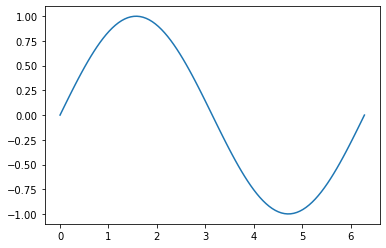

In [66]:
# Plot sin_result

plt.plot(pi_tensor.numpy(), sin_result.numpy())

## Practice
Construct a tensor with 25 steps in the range 0 to π/2. Print out the Maximum and Minimum number. Also, plot  a graph showing the diagram that shows the result.


In [67]:
tensor_practice = torch.linspace(0,np.pi/2,25)
print("Max: ",torch.max(tensor_practice),"Min: ",torch.min(tensor_practice))

Max:  tensor(1.5708) Min:  tensor(0.)


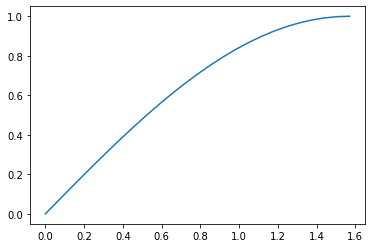

In [69]:
sin_result = torch.sin(tensor_practice)
plt.plot(tensor_practice.numpy(), sin_result.numpy())

## tensor Operations

In [70]:
# Create two sample tensors

u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

In [71]:
# Add u and v

w = u + v
print("The result tensor: ", w)

The result tensor:  tensor([1, 1])


The result is <code>tensor([1, 1])</code>. The behavior is <i>[1 + 0, 0 + 1]</i>.


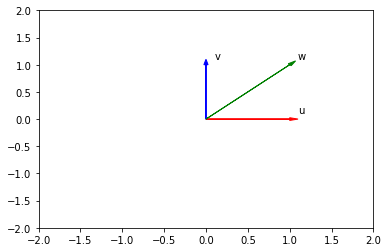

In [72]:
# Plot u, v, w

plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'},
    {"vector": w.numpy(), "name": 'w', "color": 'g'}
])

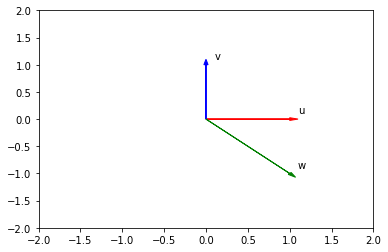

In [75]:
# Try by yourself to get a result of u-v

u = torch.tensor([1, 0])
v = torch.tensor([0, 1])
# Plot u, v, w
w=u-v
plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'},
    {"vector": w.numpy(), "name": 'w', "color": 'g'}
])

In [76]:
# tensor + scalar

u = torch.tensor([1, 2, 3, -1])
v = u + 1
print ("Addition Result: ", v)

Addition Result:  tensor([2, 3, 4, 0])


In [77]:
# tensor * scalar

u = torch.tensor([1, 2])
v = 2 * u
print("The result of 2 * u: ", v)

The result of 2 * u:  tensor([2, 4])


In [78]:
# tensor * tensor

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])
w = u * v
print ("The result of u * v", w)

The result of u * v tensor([3, 4])


In [79]:
# Calculate dot product of u, v

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])

print("Dot Product of u, v:", torch.dot(u,v))

Dot Product of u, v: tensor(7)


<h3>Practice</h3>
Convert the list <i>[-1, 1]</i> and <i>[1, 1]</i> to tensors <code>u</code> and <code>v</code>. Then, plot the tensor <code>u</code> and <code>v</code> as a vector by using the function <code>plotVec</code> and find the dot product:


The Dot Product is 0


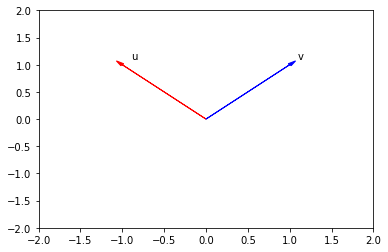

In [81]:
u =torch.tensor([-1,1])
v= torch.tensor([1,1])
plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'}
])
print("The Dot Product is",np.dot(u, v))


# 1.2_2 Two Dimension Tensors
 <p>In this lab, you will learn the basics of tensor operations on 2D tensors.</p>
<ul>
    <li><a href="#Types_Shape">Types and Shape </a></li>
    <li><a href="#Index_Slice">Indexing and Slicing</a></li>
    <li><a href="#Tensor_Op">Tensor Operations</a></li>
</ul>

<p>Estimated Time Needed: <b>10 min</b></p>
<hr>


In [82]:
#import librarary needed
import numpy as np
import matplotlib.pyplot as plt
import torch 
import pandas as pd


## Types and Shape

In [83]:
# Convert 2D List to 2D Tensor

twoD_list = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]
twoD_tensor = torch.tensor(twoD_list)
print("The New 2D Tensor: ", twoD_tensor)

The New 2D Tensor:  tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])


In [84]:
# Try tensor_obj.ndimension(), tensor_obj.shape, tensor_obj.size()

print("The dimension of twoD_tensor: ", twoD_tensor.ndimension())
print("The shape of twoD_tensor: ", twoD_tensor.shape)
print("The shape of twoD_tensor: ", twoD_tensor.size())
print("The number of elements in twoD_tensor: ", twoD_tensor.numel())

The dimension of twoD_tensor:  2
The shape of twoD_tensor:  torch.Size([3, 3])
The shape of twoD_tensor:  torch.Size([3, 3])
The number of elements in twoD_tensor:  9


In [85]:
# Convert tensor to numpy array; Convert numpy array to tensor

twoD_numpy = twoD_tensor.numpy()
print("Tensor -> Numpy Array:")
print("The numpy array after converting: ", twoD_numpy)
print("Type after converting: ", twoD_numpy.dtype)

print("================================================")

new_twoD_tensor = torch.from_numpy(twoD_numpy)
print("Numpy Array -> Tensor:")
print("The tensor after converting:", new_twoD_tensor)
print("Type after converting: ", new_twoD_tensor.dtype)

Tensor -> Numpy Array:
The numpy array after converting:  [[11 12 13]
 [21 22 23]
 [31 32 33]]
Type after converting:  int64
Numpy Array -> Tensor:
The tensor after converting: tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Type after converting:  torch.int64


In [88]:
# Try to convert the Panda Dataframe to tensor

df = pd.DataFrame({'a':[11,21,31],'b':[12,22,312]})

print("Pandas Dataframe to numpy: ", df.values)
print("Type BEFORE converting: ", df.values.dtype)

print("================================================")

new_tensor = torch.from_numpy(df.values)
print("Tensor AFTER converting: ", new_tensor)
print("Type AFTER converting: ", new_tensor.dtype)

Pandas Dataframe to numpy:  [[ 11  12]
 [ 21  22]
 [ 31 312]]
Type BEFORE converting:  int64
Tensor AFTER converting:  tensor([[ 11,  12],
        [ 21,  22],
        [ 31, 312]])
Type AFTER converting:  torch.int64


## practice


In [89]:
# Practice: try to convert Pandas Series to tensor

df = pd.DataFrame({'A':[11, 33, 22],'B':[3, 3, 2]})
converted_tensor = torch.tensor(df.values)
print ("Tensor: ", converted_tensor)

Tensor:  tensor([[11,  3],
        [33,  3],
        [22,  2]])


## indexing and slicing 
You can use rectangular brackets to access the different elements of the tensor. The correspondence between the rectangular brackets and the list and the rectangular representation is shown in the following figure for a 3X3 tensor:  

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.2index1.png" width=500 alt="Matrix Structure Introduce">

You can access the 2nd-row 3rd-column as shown in the following figure:
<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.2index.png" width="500" alt="Example of Matrix Index">



In [90]:
# Use tensor_obj[row, column] and tensor_obj[row][column] to access certain position

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print("What is the value on 2nd-row 3rd-column? ", tensor_example[1, 2])
print("What is the value on 2nd-row 3rd-column? ", tensor_example[1][2])

What is the value on 2nd-row 3rd-column?  tensor(23)
What is the value on 2nd-row 3rd-column?  tensor(23)


In [91]:
# Use tensor_obj[begin_row_number: end_row_number, begin_column_number: end_column number] 
# and tensor_obj[row][begin_column_number: end_column number] to do the slicing

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print("What is the value on 1st-row first two columns? ", tensor_example[0, 0:2])
print("What is the value on 1st-row first two columns? ", tensor_example[0][0:2])

What is the value on 1st-row first two columns?  tensor([11, 12])
What is the value on 1st-row first two columns?  tensor([11, 12])


In [92]:
# Give an idea on tensor_obj[number: number][number]

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
sliced_tensor_example = tensor_example[1:3] #[1:3][:]
print("1. Slicing step on tensor_example: ")
print("Result after tensor_example[1:3]: ", sliced_tensor_example)
print("Dimension after tensor_example[1:3]: ", sliced_tensor_example.ndimension())
print("================================================")
print("2. Pick an index on sliced_tensor_example: ")
print("Result after sliced_tensor_example[1]: ", sliced_tensor_example[1])
print("Dimension after sliced_tensor_example[1]: ", sliced_tensor_example[1].ndimension())
print("================================================")
print("3. Combine these step together:")
print("Result: ", tensor_example[1:3][1])
print("Dimension: ", tensor_example[1:3][1].ndimension())

1. Slicing step on tensor_example: 
Result after tensor_example[1:3]:  tensor([[21, 22, 23],
        [31, 32, 33]])
Dimension after tensor_example[1:3]:  2
2. Pick an index on sliced_tensor_example: 
Result after sliced_tensor_example[1]:  tensor([31, 32, 33])
Dimension after sliced_tensor_example[1]:  1
3. Combine these step together:
Result:  tensor([31, 32, 33])
Dimension:  1


In [94]:
# Use tensor_obj[begin_row_number: end_row_number, begin_column_number: end_column number] 

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print("What is the value on 3rd-column last two rows? ", tensor_example[1:3, 2])

What is the value on 3rd-column last two rows?  tensor([23, 33])


<h3>Practice</h3>
Try to change the values on the second column and the last two rows to 0. Basically, change the values on <code>tensor_ques[1][1]</code> and <code>tensor_ques[2][1]</code> to 0.



In [106]:
# Practice: Use slice and index to change the values on the matrix tensor_ques.

tensor_ques = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
tensor_ques[1:3,1]=0
print('Change:',tensor_ques)

Change: tensor([[11, 12, 13],
        [21,  0, 23],
        [31,  0, 33]])


#Tensor Operations

In [107]:
# Calculate [[1, 0], [0, 1]] + [[2, 1], [1, 2]]

X = torch.tensor([[1, 0],[0, 1]]) 
Y = torch.tensor([[2, 1],[1, 2]])
X_plus_Y = X + Y
print("The result of X + Y: ", X_plus_Y)

The result of X + Y:  tensor([[3, 1],
        [1, 3]])


In [108]:
# Calculate 2 * [[2, 1], [1, 2]]

Y = torch.tensor([[2, 1], [1, 2]]) 
two_Y = 2 * Y
print("The result of 2Y: ", two_Y)

The result of 2Y:  tensor([[4, 2],
        [2, 4]])


In [109]:
# Calculate [[1, 0], [0, 1]] * [[2, 1], [1, 2]]

X = torch.tensor([[1, 0], [0, 1]])
Y = torch.tensor([[2, 1], [1, 2]]) 
X_times_Y = X * Y
print("The result of X * Y: ", X_times_Y)

The result of X * Y:  tensor([[2, 0],
        [0, 2]])


In [110]:
# Calculate [[0, 1, 1], [1, 0, 1]] * [[1, 1], [1, 1], [-1, 1]]

A = torch.tensor([[0, 1, 1], [1, 0, 1]])
B = torch.tensor([[1, 1], [1, 1], [-1, 1]])
A_times_B = torch.mm(A,B)
print("The result of A * B: ", A_times_B)

The result of A * B:  tensor([[0, 2],
        [0, 2]])


##Practice
Try to create your own two tensors (<code>X</code> and <code>Y</code>) with different sizes, and multiply them.


In [114]:

X = torch.tensor([[0, 1], [1, 2]])
Y = torch.tensor([[-1, -2, 0], [2, 1, 2]])
X_times_Y = torch.mm(X, Y)
print("The result of X * Y: ", X_times_Y)


The result of X * Y:  tensor([[2, 1, 2],
        [3, 0, 4]])


# 1.2 Differentiation in Pytorch
<h2>Table of Contents</h2>

<p>In this lab, you will learn the basics of differentiation.</p> 

<ul>
    <li><a href="#Derivative">Derivatives</a></li>
    <li><a href="#Partial_Derivative">Partial Derivatives</a></li>
</ul>

<p>Estimated Time Needed: <strong>25 min</strong></p>
<hr>


In [115]:
#import library 
import torch 
import matplotlib.pylab as plt

In [121]:
# Create a tensor x

x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

The tensor x:  tensor(2., requires_grad=True)


In [122]:
# Create a tensor y according to y = x^2

y = x ** 2
print("The result of y = x^2: ", y)

The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)


In [123]:
# Take the derivative. Try to print out the derivative at the value x = 2

y.backward()
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor(4.)


$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x$

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)=4$


In [124]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [125]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x7fc19aee4208>
grad: None
is_leaf: False
requires_grad: True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
# Calculate the y = x^2 + 2x + 1, then find the derivative 

x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print("The result of y = x^2 + 2x + 1: ", y)
y.backward()
print("The dervative at x = 2: ", x.grad)

The result of y = x^2 + 2x + 1:  tensor(9., grad_fn=<AddBackward0>)
The dervative at x = 2:  tensor(6.)


## Practice
Determine the derivative of $ y = 2x^3+x $ at $x=1$

In [128]:
x=torch.tensor(1.0,requires_grad=True)
y=2*x**3+x
print("The result of y = x^2 + 2x + 1: ", y)
y.backward()
print("The dervative at x = 2: ", x.grad)

The result of y = x^2 + 2x + 1:  tensor(3., grad_fn=<AddBackward0>)
The dervative at x = 2:  tensor(7.)


 We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors


In [129]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [131]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

<h2 id="Partial_Derivative">Partial Derivatives</h2>
We can also calculate <b>Partial Derivatives</b>. Consider the function: $f(u,v)=vu+u^{2}$
Let us create <code>u</code> tensor, <code>v</code> tensor and  <code>f</code> tensor




In [132]:
# Calculate f(u, v) = v * u + u^2 at u = 1, v = 2

u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
print("The result of v * u + u^2: ", f)

The result of v * u + u^2:  tensor(3., grad_fn=<AddBackward0>)


$f(u=1,v=2)=(2)(1)+1^{2}=3$


In [133]:
# Calculate the derivative with respect to u

f.backward()
print("The partial derivative with respect to u: ", u.grad)

The partial derivative with respect to u:  tensor(4.)


In [134]:
# Calculate the derivative with respect to v

print("The partial derivative with respect to u: ", v.grad)

The partial derivative with respect to u:  tensor(1.)


Calculate the derivative with respect to a function with multiple values as follows. You use the sum trick to produce a scalar valued function and then take the gradient: 


In [135]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

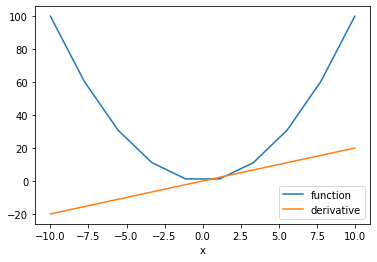

In [136]:
# Take the derivative with respect to multiple value. Plot out the function and its derivative

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

The  method <code> detach()</code>  excludes further tracking of operations in the graph, and therefore the subgraph will not record operations. This allows us to then convert the tensor to a numpy array. To understand the sum operation  <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html">Click Here</a>


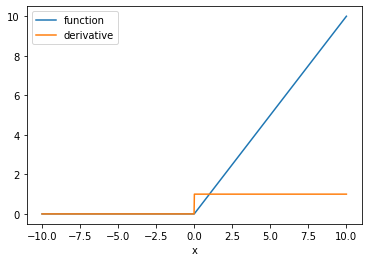

In [137]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

In [138]:
y.grad_fn

##Practice
Try to determine partial derivative  $u$ of the following function where $u=2$ and $v=1$: $ f=uv+(uv)^2$


In [142]:
u = torch.tensor(2.0, requires_grad = True)
v = torch.tensor(1.0, requires_grad = True)
f = u * v + (u * v) ** 2
f.backward()
print("The result is ", u.grad)

The result is  tensor(5.)


# 1.3.1 Simple dataset
<p>In this lab, you will construct a basic dataset by using PyTorch and learn how to apply basic transformations to it.</p> 
<ul>
    <li><a href="#Simple_Dataset">Simple dataset</a></li>
    <li><a href="#Transforms">Transforms</a></li>
    <li><a href="#Compose">Compose</a></li>
</ul>
<p>Estimated Time Needed: <strong>30 min</strong></p>
<hr>


In [143]:
# These are the libraries will be used for this lab.

import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

## simple data set

In [145]:
# Define class for dataset

class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.transform = transform
     
    # Getter
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length
    def __len__(self):
        return self.len

In [146]:
# Create Dataset Object. Find out the value on index 1. Find out the length of Dataset Object.

our_dataset = toy_set(40)
print("Our toy_set object: ", our_dataset)
print("Value on index 0 of our toy_set object: ", our_dataset[0])
print("Our toy_set length: ", len(our_dataset))

Our toy_set object:  <__main__.toy_set object at 0x7fc19af1edd8>
Value on index 0 of our toy_set object:  (tensor([2., 2.]), tensor([1.]))
Our toy_set length:  40


As a result, we can apply the same indexing convention as a <code>list</code>,
and apply the fuction <code>len</code> on the <code>toy_set</code> object. We are able to customize the indexing and length method by <code>def \_\_getitem\_\_(self, index)</code> and <code>def \_\_len\_\_(self)</code>.


In [147]:
# Use loop to print out first 3 elements in dataset

for i in range(3):
    x, y=our_dataset[i]
    print("index: ", i, '; x:', x, '; y:', y)

index:  0 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  1 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  2 ; x: tensor([2., 2.]) ; y: tensor([1.])


In [148]:
for x,y in our_dataset:
    print(' x:', x, 'y:', y)

 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 

In [149]:
my_dataset = toy_set(length = 50)
print("My toy_set length: ", len(my_dataset))

My toy_set length:  50


## Transforms
You can also create a class for transforming the data. In this case, we will try to add 1 to x and multiply y by 2:


In [150]:
# Create tranform class add_mult

class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

Assign the outputs of the original dataset to <code>x</code> and <code>y</code>. Then, apply the transform <code>add_mult</code> to the dataset and output the values as <code>x_</code> and <code>y\_</code>, respectively: 


x_ =x+1
y_=y*2

In [152]:
# Create an add_mult transform object, and an toy_set object

a_m = add_mult(3,4)
data_set = toy_set()
# Use loop to print out first 10 elements in dataset

for i in range(10):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = a_m(data_set[i])
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  3 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  3 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  4 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  4 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  5 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  5 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  6 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  6 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  7 Original x:  tensor([2.,

As the result, <code>x</code> has been added by 1 and y has been multiplied by 2, as <i>[2, 2] + 1 = [3, 3]</i> and <i>[1] x 2 = [2]</i>


In [154]:
# Create a new data_set object with add_mult object as transform

cust_data_set = toy_set(transform = a_m)
# Use loop to print out first 10 elements in dataset

for i in range(10):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  3 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  3 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  4 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  4 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  5 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  5 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  6 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  6 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  7 Original x:  tensor([2.,

In [155]:

class my_add_mult(object):   
    def __init__(self, add = 2, mul = 10):
        self.add=add
        self.mul=mul
        
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.add
        y = y + self.add
        x = x * self.mul
        y = y * self.mul
        sample = x, y
        return sample
        
       
my_dataset = toy_set(transform = my_add_mult())
for i in range(3):
    x_, y_ = my_dataset[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)


Index:  0 Transformed x_: tensor([40., 40.]) Transformed y_: tensor([30.])
Index:  1 Transformed x_: tensor([40., 40.]) Transformed y_: tensor([30.])
Index:  2 Transformed x_: tensor([40., 40.]) Transformed y_: tensor([30.])


## Compose

In [157]:
# Run the command below when you do not have torchvision installed
# !conda install -y torchvision

from torchvision import transforms

In [158]:
# Create tranform class mult

class mult(object):
    
    # Constructor
    def __init__(self, mult = 100):
        self.mult = mult
        
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x, y
        return sample

In [159]:
# Combine the add_mult() and mult()

data_transform = transforms.Compose([add_mult(), mult()])
print("The combination of transforms (Compose): ", data_transform)


The combination of transforms (Compose):  Compose(
)


The new <code>Compose</code> object will perform each transform concurrently as shown in this figure:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.3.1_trasform.png" width="500" alt="Compose PyTorch">


In [161]:
data_transform(data_set[0])

(tensor([300., 300.]), tensor([200.]))

In [162]:
x,y=data_set[0]
x_,y_=data_transform(data_set[0])
print( 'Original x: ', x, 'Original y: ', y)

print( 'Transformed x_:', x_, 'Transformed y_:', y_)

Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Transformed x_: tensor([300., 300.]) Transformed y_: tensor([200.])


In [163]:
# Create a new toy_set object with compose object as transform

compose_data_set = toy_set(transform = data_transform)

In [164]:
# Use loop to print out first 3 elements in dataset

for i in range(3):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)
    x_co, y_co = compose_data_set[i]
    print('Index: ', i, 'Compose Transformed x_co: ', x_co ,'Compose Transformed y_co: ',y_co)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  0 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  1 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([5., 5.]) Transformed y_: tensor([4.])
Index:  2 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])


Let us see what happened on index 0. The original value of <code>x</code> is <i>[2, 2]</i>, and the original value of <code>y</code> is [1]. If we only applied <code>add_mult()</code> on the original dataset, then the <code>x</code> became <i>[3, 3]</i> and y became <i>[2]</i>. Now let us see what is the value after applied both <code>add_mult()</code> and <code>mult()</code>. The result of x is <i>[300, 300]</i> and y is <i>[200]</i>. The calculation which is equavalent to the compose is <i> x = ([2, 2] + 1) x 100 = [300, 300], y = ([1] x 2) x 100 = 200</i>


In [166]:
my_compose = transforms.Compose([mult(), add_mult()])
my_transformed_dataset = toy_set(transform = my_compose)
for i in range(3):
    x_, y_ = my_transformed_dataset[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Transformed x_: tensor([201., 201.]) Transformed y_: tensor([200.])
Index:  1 Transformed x_: tensor([201., 201.]) Transformed y_: tensor([200.])
Index:  2 Transformed x_: tensor([201., 201.]) Transformed y_: tensor([200.])


# 1.3.2 Image Datasets and Transforms 
<h2>Table of Contents</h2>
<p>In this lab, you will build a dataset objects for images; many of the processes can be applied to a larger dataset. Then you will apply pre-build transforms from Torchvision Transforms to that dataset.</p>
<ul>
    <li><a href="#auxiliary"> Auxiliary Functions </a></li>
    <li><a href="#Dataset"> Datasets</a></li>
    <li><a href="#Torchvision">Torchvision Transforms</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>


In [167]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/img.tar.gz -P /resources/data


--2021-02-06 14:20:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/img.tar.gz
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50460 (49K) [application/octet-stream]
Saving to: ‘/resources/data/img.tar.gz’

img.tar.gz          100%[===================>]  49.28K  --.-KB/s    in 0.05s   

2021-02-06 14:20:24 (1.03 MB/s) - ‘/resources/data/img.tar.gz’ saved [50460/50460]



In [168]:
!tar -xf /resources/data/img.tar.gz 

In [169]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv 

--2021-02-06 14:20:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   1.60M  3.01MB/s    in 0.5s    

2021-02-06 14:20:46 (3.01 MB/s) - ‘index.csv’ saved [1680905/1680905]



In [170]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [171]:
# These are the libraries will be used for this lab.

import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

In [172]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

<h2 id="auxiliary">Auxiliary Functions</h2>
You will use the following function as components of a dataset object, in this section, you will review each of the components independently.


In [173]:
# Read CSV file from the URL and print out the first five samples
directory=""
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

In [174]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [175]:
# Get the value on location row 0, column 1 (Notice that index starts at 0)
#rember this dataset has only 100 samples to make the download faster  
print('File name:', data_name.iloc[0, 1])

File name: img/fashion0.png


In [176]:
# Get the value on location row 0, column 0 (Notice that index starts at 0.)

print('y:', data_name.iloc[0, 0])

y: Ankle boot


In [177]:
# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

File name: img/fashion1.png
class or y: T-shirt


In [178]:
# Print out the total number of rows in traing dataset

print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


## Load Image

To load the image, you need the directory and the image name. You can concatenate the variable <code>train_data_dir</code> with the name of the image stored in a Dataframe. Finally, you will store the result in the variable <code>image_name</code>


In [179]:
# Combine the directory path with file name

image_name =data_name.iloc[1, 1]
image_name

'img/fashion1.png'

In [180]:
image_path=os.path.join(directory,image_name)
image_path

'img/fashion1.png'

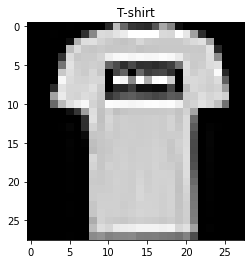

In [181]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

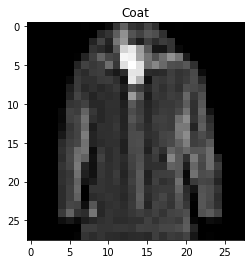

In [182]:
#plot the 20th image
image_name= data_name.iloc[19,1]
image_path=os.path.join(directory,image_name)
image=Image.open(image_path)
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.title(data_name.iloc[19,0])
plt.show()

## Create a Dataset Class

In [183]:
# Create your own dataset object

class Dataset(Dataset):
  #Constructor
  def __init__(self,csv_file,data_dir,transform=None):
    #Image directory
    self.data_dir=data_dir
    
    # The transform is goint to be used on image
    self.transform = transform
    data_dircsv_file=os.path.join(self.data_dir,csv_file)
    # Load the CSV file contians image info
    self.data_name= pd.read_csv(data_dircsv_file)
    
    # Number of images in dataset
    self.len=self.data_name.shape[0]

  #Get the length
  def __len__(self):
    return self.len

  # Getter
  def __getitem__(self, idx):
      
      # Image file path
      img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
      # Open image file
      image = Image.open(img_name)
      
      # The class label for the image
      y = self.data_name.iloc[idx, 0]
      
      # If there is any transform method, apply it onto the image
      if self.transform:
          image = self.transform(image)

      return image, y
      

In [184]:
# Create the dataset objects

dataset = Dataset(csv_file=csv_file, data_dir=directory)

Each sample of the image and the class y is stored in a tuple <code> dataset[sample]</code> . The image is the first element in the tuple <code> dataset[sample][0]</code> the label or class is the second element in the tuple <code> dataset[sample][1]</code>. For example you can plot the first image and class.


<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7FC198219898>


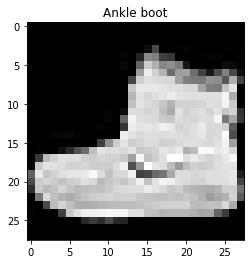

In [186]:
image=dataset[0][0]
print(image)
y=dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

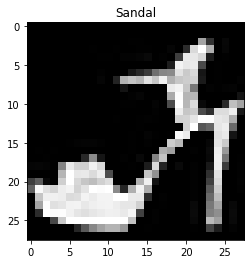

In [187]:
image=dataset[9][0]
y=dataset[9][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

## torchvision Transforms


In [188]:
import torchvision.transforms as transforms

In [189]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)


The shape of the first element tensor:  torch.Size([1, 20, 20])


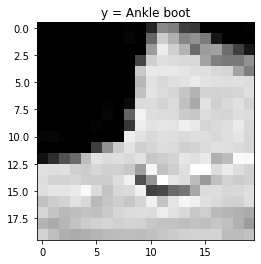

In [190]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

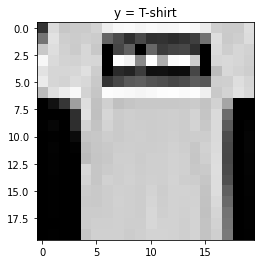

In [191]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

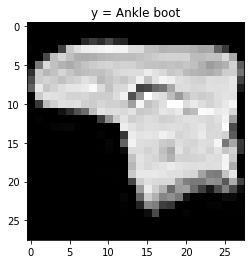

In [196]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[0])

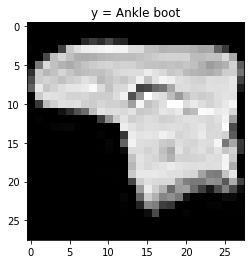

In [197]:
my_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1), transforms.RandomHorizontalFlip(p = 1), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[0])

# 1.3.3 Prebult Datasets and Transforms
<h2>Table of Contents</h2>
<p>In this lab, you will use a prebuilt dataset and then use some prebuilt dataset transforms.</p>
<ul>
    <li><a href="#Prebuilt_Dataset">Prebuilt Datasets</a></li>
    <li><a href="#Torchvision">Torchvision Transforms</a></li>
</ul>
<p>Estimated Time Needed: <strong>10 min</strong></p>

<hr>


In [198]:
# These are the libraries will be used for this lab.

import torch 
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [210]:
# Show data by diagram

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    #plt.title('y = ' + str(data_sample[1].item()))

In [207]:
# Run the command below when you do not have torchvision installed
# !conda install -y torchvision

import torchvision.transforms as transforms
import torchvision.datasets as dsets
# Import the prebuilt dataset into variable dataset

dataset = dsets.MNIST(
    root = './data', 
    train = False, 
    download = True, 
    transform = transforms.ToTensor()
)

In [208]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?

print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  7
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


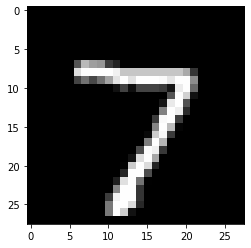

In [211]:
# Plot the first element in the dataset

show_data(dataset[0])

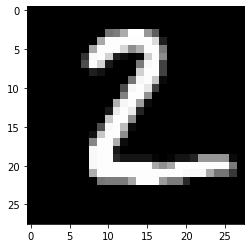

In [212]:
# Plot the second element in the dataset

show_data(dataset[1])

## Torchvision Transforms


In [213]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


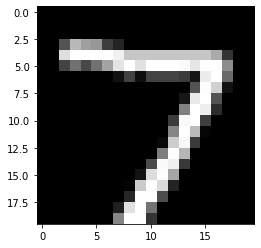

In [214]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

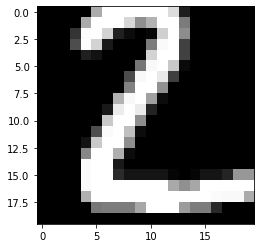

In [215]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

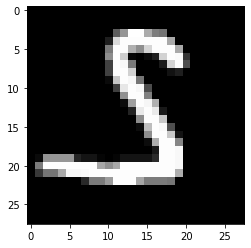

In [216]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = fliptensor_data_transform)
show_data(dataset[1])

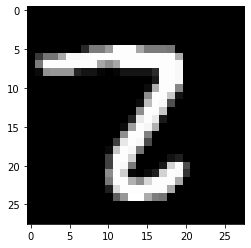

In [217]:
my_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1), transforms.RandomHorizontalFlip(p = 1), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = my_data_transform)
show_data(dataset[1])